# Problem

How to generate fake data from a flow data?

The methods I came up with:
- try mixed Gaussian Model with different number of clusters -> model selection
- non-parameteric kernel fitting
- add random noise to each data points

Below I tried each one and see the results.

# Generate a small dataset

In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt

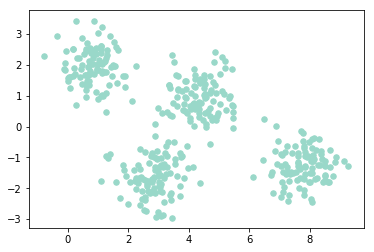

In [2]:
# Generate some data
X, y_true = make_blobs(n_samples=400, 
                       centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

#fig, axes
plt.scatter(X[:, 0], X[:, 1], s=30, color = "#99d8c9")
plt.show()

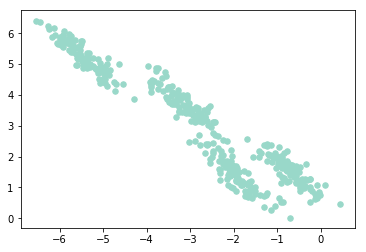

In [3]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

#fig, axes
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=30, color = "#99d8c9")
plt.show()

# Fit the data using Guassian Mixture Model (GMM)
https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html  
http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [4]:
from sklearn.mixture import GaussianMixture

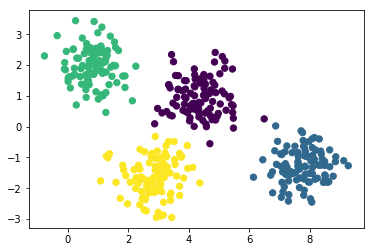

In [5]:
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

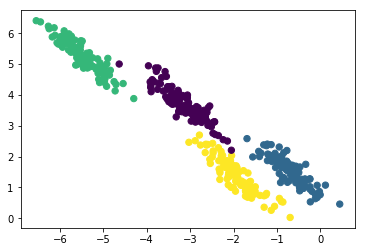

In [6]:
gmm = GaussianMixture(n_components=4).fit(X_stretched)
labels = gmm.predict(X_stretched)

plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

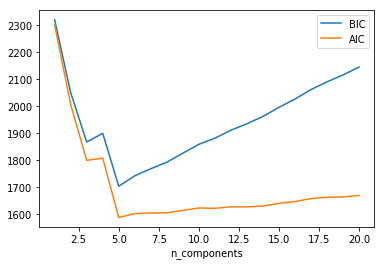

In [7]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_stretched)
          for n in n_components]

plt.plot(n_components, [m.bic(X_stretched) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_stretched) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

# Kernel Density Estimation (KDE)
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

In [8]:
from sklearn.neighbors import KernelDensity

In [9]:
kde = KernelDensity(
    bandwidth=0.04, metric='haversine',
    kernel='gaussian', algorithm='ball_tree').fit(X_stretched)

In [10]:
X_kde = kde.sample(n_samples=100)

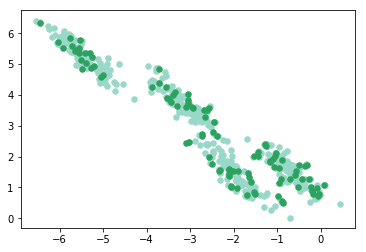

In [11]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=30, color = "#99d8c9")
plt.scatter(X_kde[:, 0], X_kde[:, 1], s=30, color = "#2ca25f")
plt.show()

# Add random noise

In [16]:
print(X_stretched.shape)
print(X_stretched.size)

(400, 2)
800


In [17]:
X_stretched_noise = X_stretched + np.random.normal(loc=0, scale = 0.1, size = X_stretched.size).reshape(X_stretched.shape)

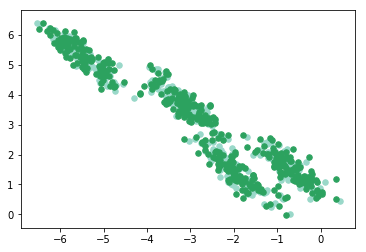

In [14]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], s=30, color = "#99d8c9")
plt.scatter(X_stretched_noise[:, 0], X_stretched_noise[:, 1], s=30, color = "#2ca25f")
plt.show()

# try larger dataset

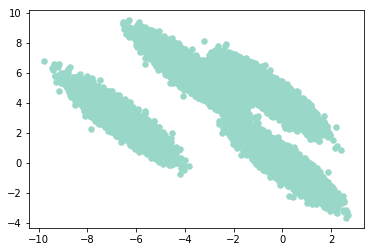

In [26]:
# Generate some data
X2, y_true = make_blobs(n_samples=100000, 
                       centers=[(0, 0), (-10, 10), (10, 0), (5, 5)],
                       cluster_std=1, random_state=0)
X2 = X2[:, ::-1] # flip axes for better plotting

# strech the data
rng = np.random.RandomState(13)
X2 = np.dot(X2, rng.randn(2, 2))

#fig, axes
plt.scatter(X2[:, 0], X2[:, 1], s=30, color = "#99d8c9")
plt.show()

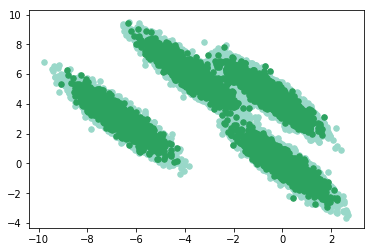

In [28]:
kde = KernelDensity(
    bandwidth=0.04, metric='haversine',
    kernel='gaussian', algorithm='ball_tree').fit(X2)
X2_kde = kde.sample(n_samples=10000)

plt.scatter(X2[:, 0], X2[:, 1], s=30, color = "#99d8c9")
plt.scatter(X2_kde[:, 0], X2_kde[:, 1], s=30, color = "#2ca25f")
plt.show()

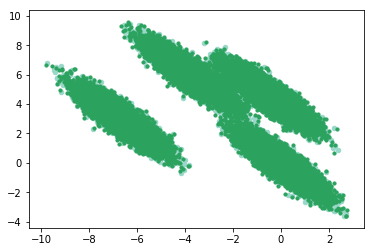

In [30]:
X2_noise = X2 + np.random.normal(loc=0, scale = 0.1, size = X2.size).reshape(X2.shape)

plt.scatter(X2[:, 0], X2[:, 1], s=20, color = "#99d8c9")
plt.scatter(X2_noise[:, 0], X2_noise[:, 1], s=10, color = "#2ca25f")
plt.show()